## Stimulate network of 100 neurons with Poisson stimulation

In [1]:
import torch
import sys
import matplotlib.pyplot as plt
sys.path.append('../')

from spiking_network.models import SpikingModel
from spiking_network.plotting import visualize_spikes, visualize_weights
from spiking_network.utils import simulate, sparse_to_dense
from spiking_network.stimulation import PoissonStimulation
from spiking_network.datasets import W0Dataset, GlorotParams

In [2]:
# Create a dataset with 100 neurons
n_neurons = 100
datasets = 1
n_steps = 10000
dataset = W0Dataset(n_neurons, datasets, GlorotParams())
w0 = dataset[0]

# Create a spiking model
model = SpikingModel()

# Create a Poisson stimulation
targets = torch.randint(0, n_neurons, (10,)).tolist()
stimulation = PoissonStimulation(targets, periods=5, temporal_scales=2, strengths=2, duration=n_steps, n_neurons=n_neurons)

# Simulate the model
X = simulate(model, w0, n_steps, stimulation=stimulation)

100%|██████████| 10000/10000 [00:02<00:00, 3355.25it/s]


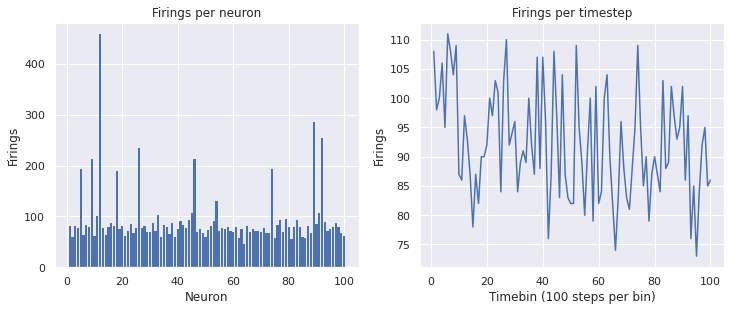

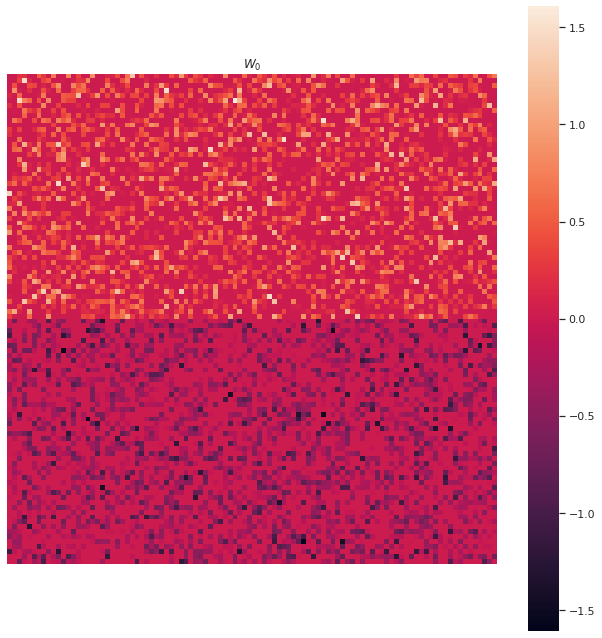

In [4]:
# Plot the results
visualize_spikes(X)

# Plot the weights
W = sparse_to_dense(model.connectivity_filter(w0.W0, w0.edge_index), w0.edge_index)
visualize_weights(W[:, :, 0])